In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
import random

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


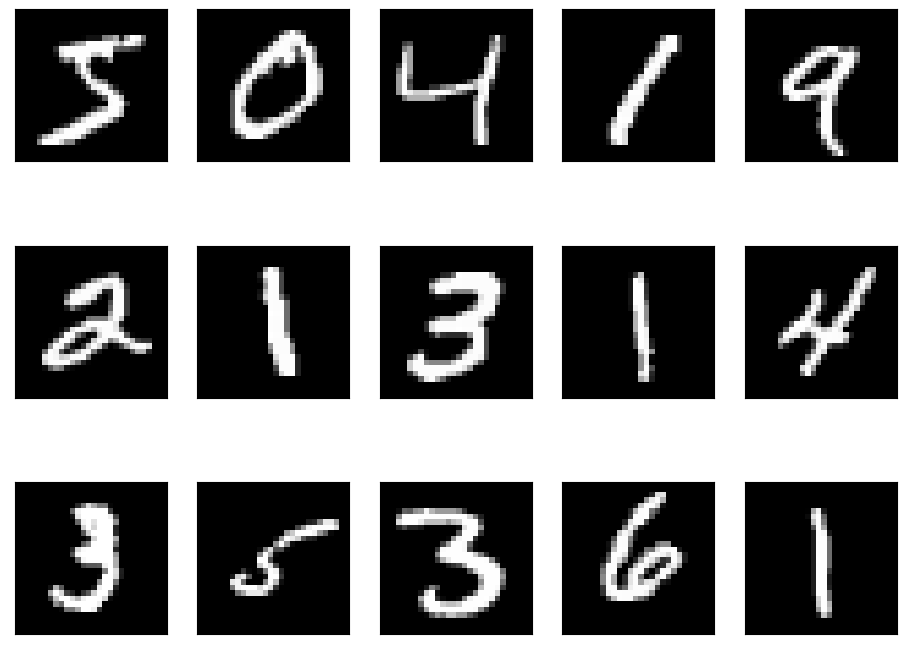

In [3]:
#画图 3行5列
n_row=3
n_col=5
plt.figure(figsize=(1.8*n_col,2.4*n_row))
plt.subplots_adjust(bottom=0,left=.01,right=.99,top=.90,hspace=.35)
for i in range(n_row*n_col):
    plt.subplot(n_row,n_col,i+1)
    plt.imshow(train_images[i],cmap=plt.cm.gray)#plt.cm.gray看灰度图
    plt.xticks(())#去掉x坐标
    plt.yticks(())


plt.show()

In [4]:
# 灰度函数返回数字
def plot_digit(digit, dem = 28, font_size = 12):
    max_ax = font_size * dem

    fig = plt.figure(figsize=(13, 13))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')
    black = '#000000'

    for idx in range(dem):
        for jdx in range(dem):

            t = plt.text(idx * font_size, max_ax - jdx*font_size, digit[jdx][idx], fontsize = font_size, color = black)
            c = digit[jdx][idx] / 255.
            t.set_bbox(dict(facecolor=(c, c, c), alpha = 0.5, edgecolor = 'black'))

    plt.show()

1


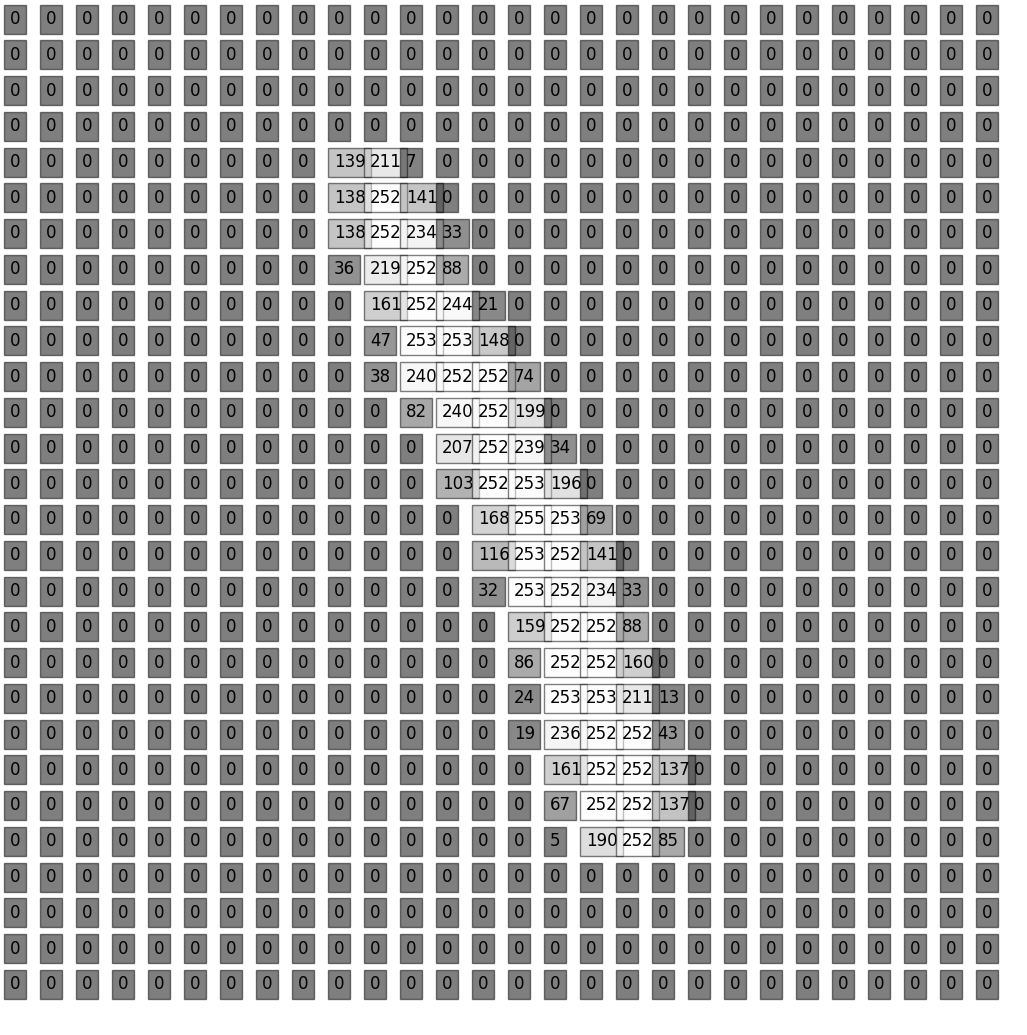

In [5]:
train_images_plot = train_images.reshape(-1, 28, 28)

rand_number = random.randint(0, len(train_labels))
print(train_labels[rand_number])
plot_digit(train_images_plot[rand_number])

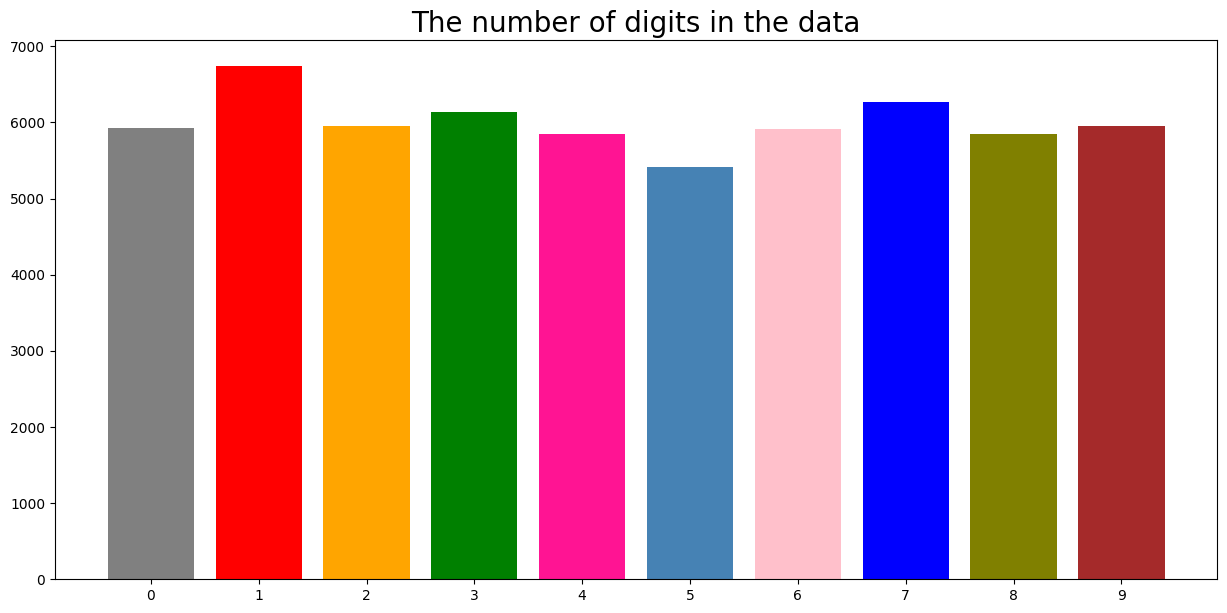

In [6]:
digit_range = np.arange(10)

###########
y_train=pd.Series(train_labels)

val = y_train.value_counts().index
cnt = y_train.value_counts().values
mycolors = ['red', 'blue', 'green', 'orange', 'brown', 'grey', 'pink', 'olive', 'deeppink', 'steelblue']

plt.figure(figsize = (15, 7))
plt.title("The number of digits in the data", fontsize = 20)
plt.xticks(range(10))
plt.bar(val, cnt, color = mycolors);

In [7]:
#将其变换为一个形状为(60000, 28 * 28)，取值范围为 0~1 的数组。
train_images = train_images.reshape(60000, 28 * 28).astype('float32') / 255
test_images = test_images.reshape(10000, 28 * 28).astype('float32') / 255
#min-max 归一化在图像处理上非常常用，因为大部分的像素值范围是 [0, 255]。

# PCA

In [8]:
# 设置测试数据数量
x_train, y_train = train_images[:7000], train_labels[:7000]
x_test, y_test = test_images[:3000], test_labels[:3000]

In [9]:
pca = PCA(n_components=100)#把原来点压缩为100个维度
x_train_pca = pca.fit_transform(x_train)
y_train_pca = y_train
x_test_pca = pca.transform(x_test)
y_test_pca = y_test


# 函数

In [10]:
def ClaReport(ytest,predic):
    # 召回率、准确率、F1
    print('precision:%.4f' % precision_score(y_true=ytest, y_pred=predic,average= 'macro'))
    print('recall:%.4f' % recall_score(y_true=ytest, y_pred=predic,average= 'macro'))
    print('F1:%.4f' % f1_score(y_true=ytest, y_pred=predic,average= 'macro'))

In [11]:
def MatVisual(conf):
    fig, ax = plt.subplots(figsize=(10, 9))

    sns.heatmap(conf,annot=True,ax=ax) #plot heatmap


    ax.set_title('Confusion Matrix \n\n')
    ax.set_xlabel('predict')
    ax.set_ylabel('true') #

    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

# Relu 四层 PCA

In [12]:
#定义神经网络模型
mlp=MLPClassifier(hidden_layer_sizes=(100,50),activation="relu",max_iter=500)#hidden_layer_sizes=(100,50)两个隐藏层，第一个100个神经元，第二个50个神经元。还能再加。
#输出、输入不用设置，自动判断。#max_iter=500迭代周期，就是迭代多少次
mlp.fit(x_train_pca,y_train_pca)#训练

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [13]:
predictions=mlp.predict(x_test_pca)#做预测
print(classification_report(y_test_pca,predictions))#放入测试集标签与预测，算出precision recall f1

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       271
           1       0.97      0.99      0.98       340
           2       0.93      0.92      0.92       313
           3       0.92      0.93      0.93       316
           4       0.91      0.94      0.92       318
           5       0.94      0.89      0.91       283
           6       0.93      0.94      0.93       272
           7       0.93      0.91      0.92       306
           8       0.91      0.85      0.88       286
           9       0.91      0.92      0.92       295

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



In [14]:
ClaReport(y_test,predictions)

precision:0.9261
recall:0.9259
F1:0.9257


In [15]:
# 混淆矩阵并可视化
confmat = confusion_matrix(y_true=y_test_pca, y_pred=predictions)  # 输出混淆矩阵
print(confmat)

[[266   0   1   0   0   1   3   0   0   0]
 [  0 335   1   0   0   0   3   0   1   0]
 [  4   1 288   1   1   2   5   3   6   2]
 [  0   1   5 295   0   6   3   3   3   0]
 [  0   0   1   0 298   0   3   0   3  13]
 [  6   0   0   8   2 252   1   6   7   1]
 [  5   3   1   0   4   1 255   0   3   0]
 [  0   5   9   2   5   0   0 277   0   8]
 [  5   1   3  12   7   6   2   5 242   3]
 [  4   1   1   2  10   0   0   3   2 272]]


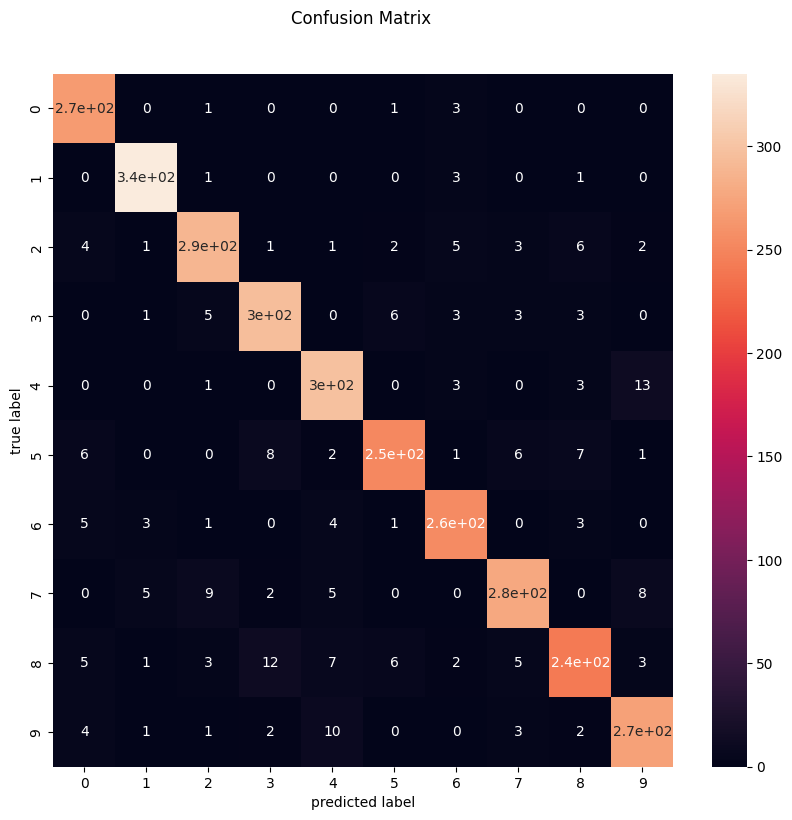

In [16]:
MatVisual(confmat)

# logistic sigmoid 两层 PCA

In [17]:
#定义神经网络模型
mlp=MLPClassifier(hidden_layer_sizes=(100,50),activation="logistic",max_iter=500)#hidden_layer_sizes=(100,50)两个隐藏层，第一个100个神经元，第二个50个神经元。还能再加。
#输出、输入不用设置，自动判断。#max_iter=500迭代周期，就是迭代多少次
mlp.fit(x_train_pca,y_train_pca)#训练

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50), max_iter=500)

In [18]:
predictions=mlp.predict(x_test_pca)#做预测
print(classification_report(y_test_pca,predictions))#放入测试集标签与预测，算出precision recall f1

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       271
           1       0.96      0.98      0.97       340
           2       0.90      0.91      0.91       313
           3       0.90      0.90      0.90       316
           4       0.91      0.93      0.92       318
           5       0.89      0.87      0.88       283
           6       0.92      0.90      0.91       272
           7       0.92      0.90      0.91       306
           8       0.91      0.85      0.88       286
           9       0.90      0.90      0.90       295

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



In [19]:
ClaReport(y_test,predictions)

precision:0.9126
recall:0.9124
F1:0.9122


In [20]:
# 混淆矩阵并可视化
confmat = confusion_matrix(y_true=y_test_pca, y_pred=predictions)  # 输出混淆矩阵
print(confmat)

[[266   0   1   0   0   0   3   0   1   0]
 [  0 334   1   0   1   0   2   0   2   0]
 [  3   2 286   3   1   2   5   4   5   2]
 [  1   1   8 284   0  11   2   5   3   1]
 [  0   2   0   1 296   2   5   1   0  11]
 [  6   0   1  10   4 245   2   5   7   3]
 [  7   3   2   0   7   3 246   0   4   0]
 [  2   4  11   2   2   1   0 276   0   8]
 [  4   2   6  11   4   7   1   5 242   4]
 [  2   1   1   3  11   4   1   4   3 265]]


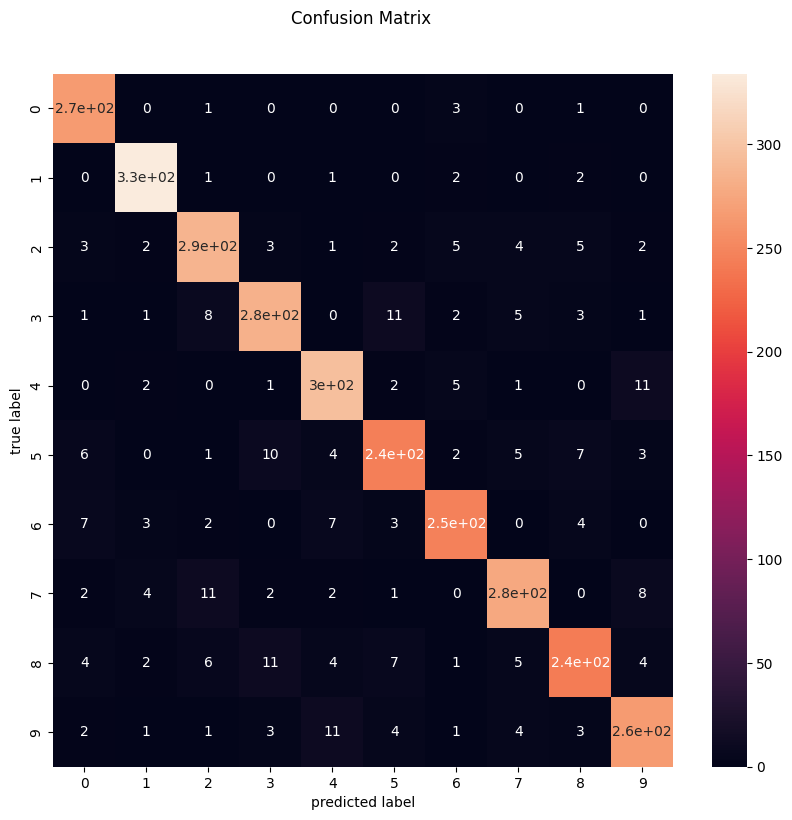

In [21]:
MatVisual(confmat)

# 构建

In [22]:
train = pd.read_csv("train.csv")

In [23]:
print("训练元素的数量： {}". format(len(train)))

Quantidade de elementos de treino: 42000


In [24]:
Y = train["label"]
X = train.drop(labels = ["label"],axis = 1)
print(X.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [25]:
# 将 2d 图像转换为 numpy 数组（图像 28*28 = 784 像素）
x = X.values.reshape(42000, 784)

#归一化为 0 到 1 之间的值
x = x.astype('float32')
x /= 255

In [26]:
import keras

# 让我们调整输出格式
num_classes = 10

# 转换为 10 维输出向量
# ex. 8 => [0,0,0,0,0,0,0,0,1,0]
y = keras.utils.to_categorical(Y, num_classes)

In [27]:
# 分离一部分用于训练 (90%) 和另一部分用于验证 (10%)
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1, random_state=9)

In [28]:
model = Sequential()
#具有 30 个神经元的层
model.add(Dense(30, activation='relu', input_shape=(784,)))
# 20% 辍学
model.add(Dropout(0.2))
# 20 个神经元层
model.add(Dense(20, activation='relu'))
# 20% 辍学
model.add(Dropout(0.2))
#最终分类层，每个输出类有 1 个神经元。 Softmax 划分每个类的概率。
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [29]:
from keras.optimizers import RMSprop
# 编译模型#分类交叉熵
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [30]:
# 用数据片段训练
batch_size = 32
epochs = 30
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/30
1182/1182 [==============================] - 3s 2ms/step - loss: 0.7794 - accuracy: 0.7543 - val_loss: 0.2966 - val_accuracy: 0.9102
Epoch 2/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.4378 - accuracy: 0.8685 - val_loss: 0.2377 - val_accuracy: 0.9329
Epoch 3/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.3781 - accuracy: 0.8897 - val_loss: 0.2233 - val_accuracy: 0.9333
Epoch 4/30
1182/1182 [==============================] - 3s 2ms/step - loss: 0.3464 - accuracy: 0.9008 - val_loss: 0.2095 - val_accuracy: 0.9412
Epoch 5/30
1182/1182 [==============================] - 3s 2ms/step - loss: 0.3255 - accuracy: 0.9070 - val_loss: 0.2212 - val_accuracy: 0.9333
Epoch 6/30
1182/1182 [==============================] - 3s 2ms/step - loss: 0.3150 - accuracy: 0.9116 - val_loss: 0.2001 - val_accuracy: 0.9443
Epoch 7/30
1182/1182 [==============================] - 3s 2ms/step - loss: 0.3155 - accuracy: 0.9134 - val_loss: 0.1992 - val_accuracy:

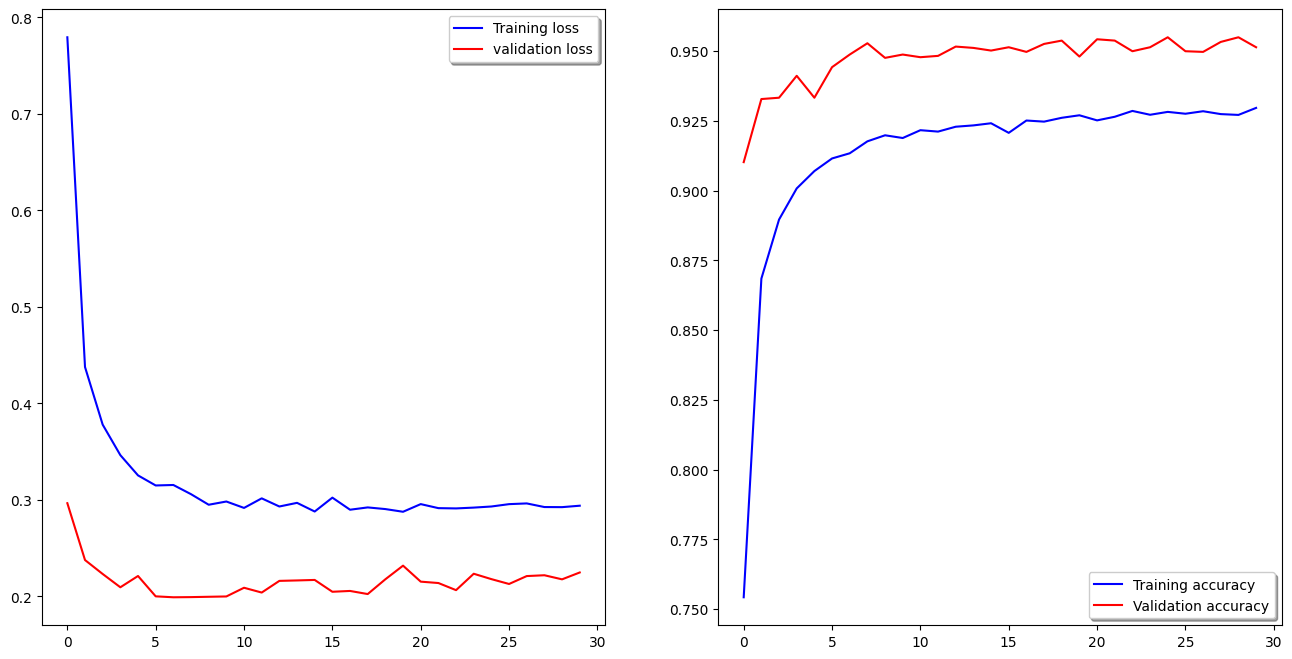

In [31]:
#让我们看看训练进行得如何？

fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [32]:
# Testa
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22485488653182983
Test accuracy: 0.9514285922050476


# 完